In [7]:
from skimage import io

from filter import Filter
from loader import Load
from matplotlib import pyplot as plt

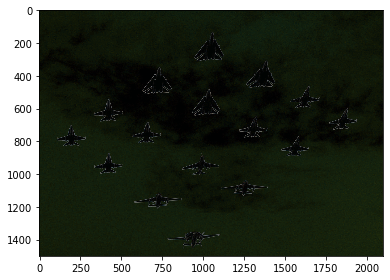

In [9]:
def main():
    img = Load.img('samolot00.jpg')
    #io.imshow(img)
    #plt.show()

    # Filter.gray(img)
    # Filter.median(img)
    # Filter.gaussian(img)
    # Filter.sobel(img)
    # Filter.canny()
    # Filter.dilation(img)
    # Filter.erosion(img)
    # Filter.contur3(img)


if __name__ == '__main__':
    main()